# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress
from scipy import stats
from datetime import date
from citipy import citipy
from pprint import pprint
from api_keys import weather_api_key
from api_keys import g_key

# Set output file path
output_data_file = 2369

# Set range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# Lists for holding latitude, longitude and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

In [3]:
# Create lists to hold data
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=55fb9823a20c70e9d28d096302f04a28&units=imperial&q='

In [5]:
print("Beginning Data Retrieval ")
print("-----------------------------")


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : saskylakh
Processing Record 2 of Set 1 : hithadhoo
Processing Record 3 of Set 1 : moscow
Processing Record 4 of Set 1 : rikitea
Processing Record 5 of Set 1 : bluff
Processing Record 6 of Set 1 : jamestown
Processing Record 7 of Set 1 : nanortalik
Processing Record 8 of Set 1 : sao filipe
Processing Record 9 of Set 1 : saldanha
Processing Record 10 of Set 1 : gasa
Processing Record 11 of Set 1 : ushuaia
Processing Record 12 of Set 1 : gizo
Processing Record 13 of Set 1 : gamba
Processing Record 14 of Set 1 : adrar
Processing Record 15 of Set 1 : saint george
Processing Record 16 of Set 1 : roma
Processing Record 17 of Set 1 : avera
Processing Record 18 of Set 1 : hobart
Processing Record 19 of Set 1 : salalah
Processing Record 20 of Set 1 : hohhot
Processing Record 21 of Set 1 : bon air
Processing Record 22 of Set 1 : constitucion
Processing Record 23 of Set 1 : qaanaaq
City not found. Skipping...
Pr

Processing Record 34 of Set 4 : kahului
Processing Record 35 of Set 4 : pacific grove
Processing Record 36 of Set 4 : krasnaya gorbatka
Processing Record 37 of Set 4 : cap-aux-meules
Processing Record 38 of Set 4 : moanda
Processing Record 39 of Set 4 : aguimes
Processing Record 40 of Set 4 : margate
Processing Record 41 of Set 4 : hofn
Processing Record 42 of Set 4 : porbandar
City not found. Skipping...
Processing Record 43 of Set 4 : butaritari
City not found. Skipping...
Processing Record 44 of Set 4 : mackay
Processing Record 45 of Set 4 : ugoofaaru
Processing Record 46 of Set 4 : pestravka
Processing Record 47 of Set 4 : concarneau
Processing Record 48 of Set 4 : faya
Processing Record 49 of Set 4 : andenes
Processing Record 50 of Set 4 : iqaluit
Processing Record 0 of Set 5 : inirida
Processing Record 1 of Set 5 : luderitz
Processing Record 2 of Set 5 : petropavlovsk-kamchatskiy
Processing Record 3 of Set 5 : souillac
Processing Record 4 of Set 5 : khipro
Processing Record 5 of 

Processing Record 14 of Set 8 : eenhana
City not found. Skipping...
Processing Record 15 of Set 8 : severo-yeniseyskiy
Processing Record 16 of Set 8 : westport
Processing Record 17 of Set 8 : chara
Processing Record 18 of Set 8 : skowhegan
Processing Record 19 of Set 8 : nadym
Processing Record 20 of Set 8 : malabo
Processing Record 21 of Set 8 : sheridan
Processing Record 22 of Set 8 : namibe
Processing Record 23 of Set 8 : ducheng
Processing Record 24 of Set 8 : oxapampa
Processing Record 25 of Set 8 : hamilton
Processing Record 26 of Set 8 : otorohanga
Processing Record 27 of Set 8 : burnie
Processing Record 28 of Set 8 : komsomolskiy
Processing Record 29 of Set 8 : tubuala
Processing Record 30 of Set 8 : suleja
Processing Record 31 of Set 8 : matamoros
Processing Record 32 of Set 8 : fortuna
Processing Record 33 of Set 8 : wanning
Processing Record 34 of Set 8 : champerico
Processing Record 35 of Set 8 : amahai
Processing Record 36 of Set 8 : tashara
Processing Record 37 of Set 8 :

Processing Record 47 of Set 11 : agadez
Processing Record 48 of Set 11 : abalak
Processing Record 49 of Set 11 : ayorou
Processing Record 50 of Set 11 : batsfjord
Processing Record 0 of Set 12 : boguchany
City not found. Skipping...
Processing Record 1 of Set 12 : pandan
Processing Record 2 of Set 12 : tabas
Processing Record 3 of Set 12 : la paz
Processing Record 4 of Set 12 : kupang
Processing Record 5 of Set 12 : taltal
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Create Dataframe
city_data = pd.DataFrame({ 
                "City" : city_name_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Humidity" : humidity_list,
                "Cloudiness" : cloudiness_list,
                "Wind Speed" : wind_speed_list,
                "Country" : country_list,
                "Date" : date_list,
            
})
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.9167,114.0833,34.38,97,100,19.57,RU,1631812804
1,Hithadhoo,-0.6000,73.0833,83.91,70,100,9.78,MV,1631812805
2,Moscow,55.7522,37.6156,46.83,67,100,6.93,RU,1631812729
3,Rikitea,-23.1203,-134.9692,73.17,77,7,14.70,PF,1631812807
4,Bluff,-46.6000,168.3333,36.81,73,70,11.95,NZ,1631812807


In [7]:
# Export csv to Output foler
city_data.to_csv("output_data/cities_weather.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# Exclude cities with humidity over 100%

humidity_over100 = city_data['Humidity']>100
city_data_clean = city_data[-humidity_over100]
city_data_withover100 = city_data[humidity_over100]

city_data_clean.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.9167,114.0833,34.38,97,100,19.57,RU,1631812804
1,Hithadhoo,-0.6000,73.0833,83.91,70,100,9.78,MV,1631812805
2,Moscow,55.7522,37.6156,46.83,67,100,6.93,RU,1631812729
3,Rikitea,-23.1203,-134.9692,73.17,77,7,14.70,PF,1631812807
4,Bluff,-46.6000,168.3333,36.81,73,70,11.95,NZ,1631812807


In [9]:
city_data['Humidity'].describe()

count    566.000000
mean      67.477032
std       22.808677
min        2.000000
25%       56.000000
50%       73.000000
75%       84.750000
max      100.000000
Name: Humidity, dtype: float64

### Max humidity value in the original Dataset is 100. so conclusion is, No cities were found with Humidity over 100

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [1]:
plt.scatter(city_data['Lat'], city_data['Max Temp'], marker = "o", edgecolor='black')

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title('City Latitude vs Max Temperature on 16/09/2021')
plt.grid(True)
plt.savefig("output_data/City Latitude vs Max Temperature.png")

# Display plot
plt.show()

NameError: name 'plt' is not defined


Observation: As the latitude  increases or decreases, the temparature drops. Highest temperature is recorded near the equator

In [14]:
#Plot shows latitude vs temperature. 
#Cities which are closer to the eaquator are hotter. 


## Latitude vs. Humidity Plot

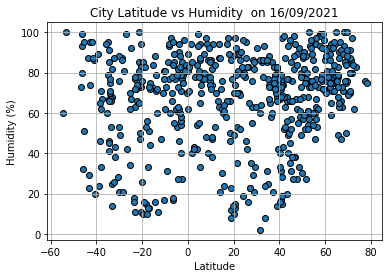

In [15]:
# Create a scatter plot based on new dataframe above (weather data frame )
plt.scatter(city_data['Lat'], city_data['Humidity'], marker = "o", edgecolor='black')

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('City Latitude vs Humidity  on 16/09/2021')
plt.grid(True)
plt.savefig("output_data/City Latitude vs Humidity.png")
plt.show()

 Humidity is randomly spread across the globe. No relation here

## Latitude vs. Cloudiness Plot

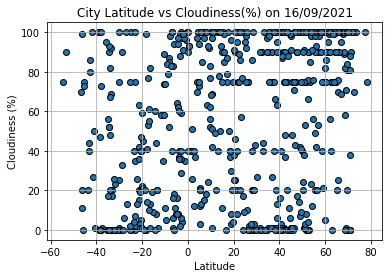

In [16]:
# Create a scatter plot based on new dataframe above (weather data frame )
plt.scatter(city_data['Lat'], city_data['Cloudiness'], marker = "o", edgecolor='black')


# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title('City Latitude vs Cloudiness(%) on 16/09/2021')
plt.grid(True)
plt.savefig("output_data/City Latitude vs Cloudiness.png")
plt.show()

 Cloudiness is randomly spread across the globe

## Latitude vs. Wind Speed Plot

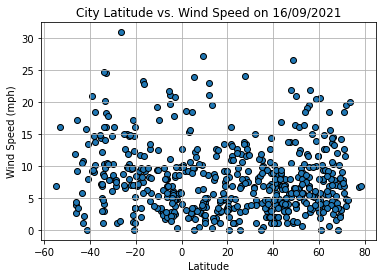

In [17]:
# Create a scatter plot based on new dataframe above (weather data frame )
plt.scatter(city_data['Lat'], city_data['Wind Speed'], marker = "o", edgecolor='black')

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title('City Latitude vs. Wind Speed on 16/09/2021')
plt.grid(True)
plt.savefig("output_data/City Latitude vs Wind Speed.png")

# Display plot
plt.show()

We can see the wind speed is higher around the prime meridian

## Linear Regression

In [18]:

northern_hemisphere = city_data.loc[city_data["Lat"] >= 0.0]
northern_hemisphere.reset_index(inplace=True)

southern_hemisphere = city_data.loc[city_data["Lat"] < 0.0]
southern_hemisphere.reset_index(inplace=True)

In [19]:
northern_hemisphere.head()

,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Saskylakh,71.9167,114.0833,34.38,97,100,19.57,RU,1631812804
1,2,Moscow,55.7522,37.6156,46.83,67,100,6.93,RU,1631812729
2,5,Jamestown,42.0970,-79.2353,75.02,52,1,7.00,US,1631812376
3,6,Nanortalik,60.1432,-45.2371,37.53,78,100,2.86,GL,1631812809
4,7,São Filipe,14.8961,-24.4956,80.87,76,90,12.73,CV,1631812810


In [20]:
southern_hemisphere.head()

,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,1,Hithadhoo,-0.6000,73.0833,83.91,70,100,9.78,MV,1631812805
1,3,Rikitea,-23.1203,-134.9692,73.17,77,7,14.70,PF,1631812807
2,4,Bluff,-46.6000,168.3333,36.81,73,70,11.95,NZ,1631812807
3,8,Saldanha,-33.0117,17.9442,57.25,68,0,24.54,ZA,1631812810
4,10,Ushuaia,-54.8000,-68.3000,40.62,60,75,6.91,AR,1631812812


In [21]:
def plot_Linear_Regression(xdata,ydata,xlabel,ylabel,name):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(xdata, ydata)
    print(f"The r-value is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,(70,50),xycoords='figure points',fontsize=12,color="red")
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(name)
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8381067608188747


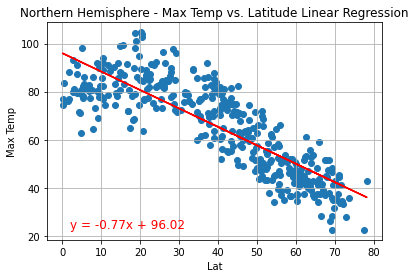

In [22]:

# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Max Temp"
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plot_Linear_Regression(northern_hemisphere[xlabel],northern_hemisphere[ylabel],xlabel,ylabel,"output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7355486911344499


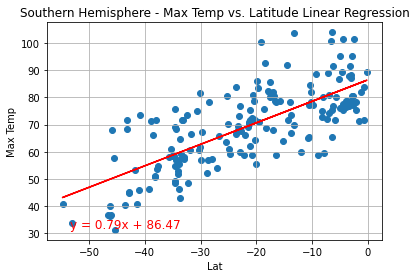

In [23]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Max Temp"
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plot_Linear_Regression(southern_hemisphere[xlabel],southern_hemisphere[ylabel],xlabel,ylabel,"output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1763591748140387


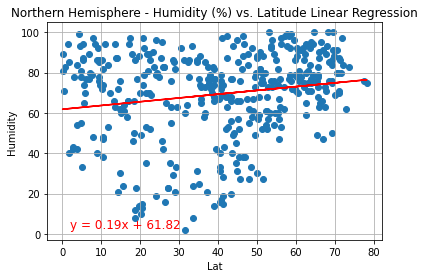

In [24]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Humidity"
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plot_Linear_Regression(northern_hemisphere[xlabel],northern_hemisphere[ylabel],xlabel,ylabel,"output_data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.022613053100493153


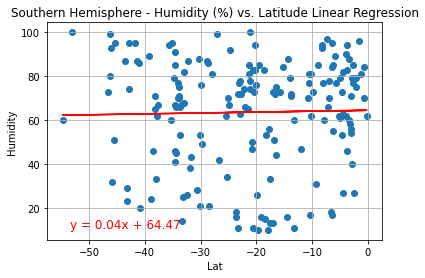

In [25]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Humidity"
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plot_Linear_Regression(southern_hemisphere[xlabel],southern_hemisphere[ylabel],xlabel,ylabel,"output_data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1349586218738115


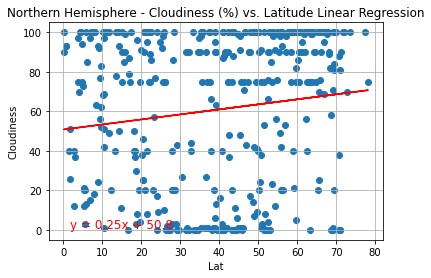

In [26]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Cloudiness"
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plot_Linear_Regression(northern_hemisphere[xlabel],northern_hemisphere[ylabel],xlabel,ylabel,"output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.10375960036240528


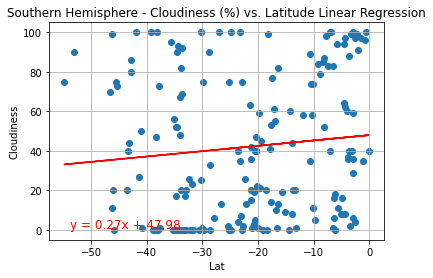

In [27]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Cloudiness"
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plot_Linear_Regression(southern_hemisphere[xlabel],southern_hemisphere[ylabel],xlabel,ylabel,"output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.044128721964930014


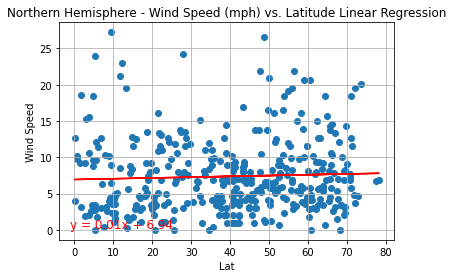

In [28]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Wind Speed"
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plot_Linear_Regression(northern_hemisphere[xlabel],northern_hemisphere[ylabel],xlabel,ylabel,"output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.1837163135192352


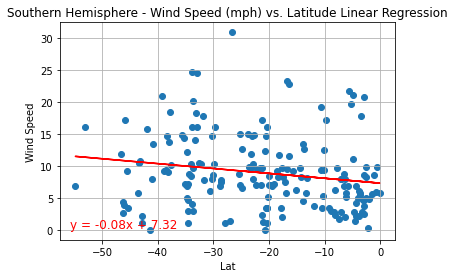

In [29]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Wind Speed"
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plot_Linear_Regression(southern_hemisphere[xlabel],southern_hemisphere[ylabel],xlabel,ylabel,"output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")